# Lab 1
+ ## Автор: Роман Кривохижа
+ ## Група: ІС-72
+ ## Викладач: Новікова П.А.

****
****
****

## Module importing

In [1]:
import numpy as np

In [2]:
from scipy import stats

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style('darkgrid')
%matplotlib inline

## I. Exponential distribution

### Генерація даних з параметром $\lambda$ = 10

#### 1. Згенеруємо $N$ випадкових, рівномірно розподілених в інтервалі (0, 1) чисел $\epsilon_i$

In [5]:
n = 10000
lambda_1 = 10

In [6]:
epsilon_uniform = np.random.uniform(low=0, high=1, size=n)

**Побудуємо гістрограму даного розподілу:**

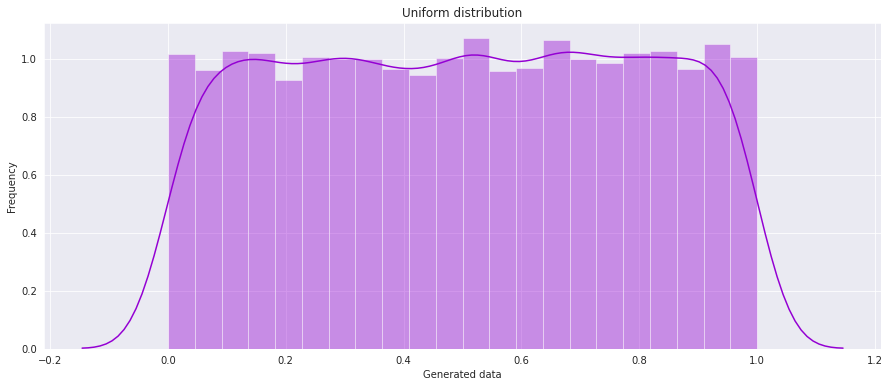

In [7]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

sns.distplot(epsilon_uniform, ax=ax, color='darkviolet')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'Frequency')
ax.set_title(u'Uniform distribution');

+ розподіл схожий на рівномірний
+ дані розподілені в інтервалі (0, 1)

**Перевіримо значення математичного сподівання та дисперсії, порівняємо з теоретичними:**

$M(\epsilon) = \int_0^1 x \,dx = \frac{1}{2}$

$D(\epsilon) = \int_0^1 (x - \frac{1}{2})^2 \,dx = \frac{1}{12}$

In [8]:
print('M(epsilon) = %s\nD(epsilon) = %s' % (epsilon_uniform.mean(), epsilon_uniform.std(ddof=1)**2))

M(epsilon) = 0.5022906859077897
D(epsilon) = 0.08371993880498886


+ значення математичного очікування та дисперсії подібні до теоретичних

#### 2. Згенеруємо $N$ чисел $x_i$ з експоненційного розподілу

$x_i = -\frac{1}{\lambda} ln(\epsilon_i)$

In [9]:
x_exp = -np.log(epsilon_uniform) / lambda_1

**Побудуємо гістрограму та KDE plot для згенерованих даних**

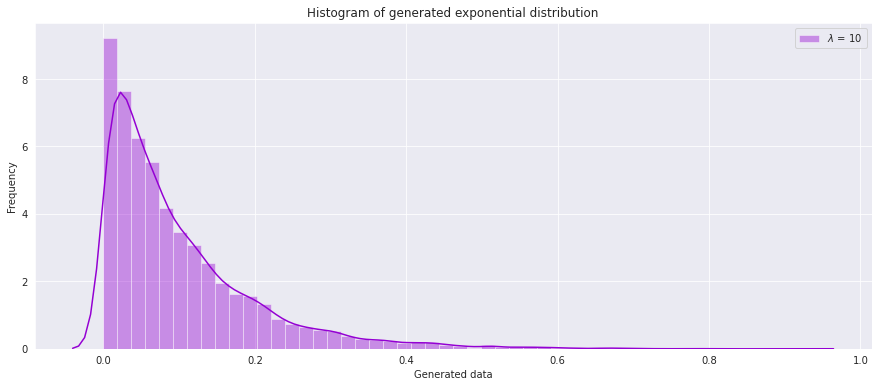

In [10]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

sns.distplot(x_exp, ax=ax, color='darkviolet', label=f'$\lambda$ = {lambda_1}')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'Frequency')
ax.set_title(u'Histogram of generated exponential distribution');
ax.legend();

+ розподіл даних подібний до експоненційного

**Перевіримо значення математичного сподівання та дисперсії, порівняємо з теоретичними:**

$\mu = \frac{1}{\lambda}$

$D(x) = \sigma^2$, де $\sigma = \frac{1}{\lambda}$

In [11]:
print('M(x) = %s\nstd(x) = %s\nD(x) = %s' % (x_exp.mean(), x_exp.std(ddof=1), x_exp.std(ddof=1)**2))

M(x) = 0.09969482379830981
std(x) = 0.10032798023481321
D(x) = 0.010065703617997069


+ математичне сподівання приблизно дорівнює стандартному квадратичному відхиленню

**Створимо єдину функцію для генерування випадкового розподілу:**

In [12]:
def generate_exp_distr(lambda_val, n=10000):
    epsilon_uniform = np.random.uniform(low=0, high=1, size=n)
    return -np.log(epsilon_uniform) / lambda_val

#### 3. Cumulative distribution function

$F(x) = 1 - e^{-\lambda x}$

In [13]:
def exp_cdf(x, l):
    """
        Cumulative distribution function 
    """
    return 1 - np.exp(-l*x) # F


def exp_pdf(x, l):
    """
        Probability density function
    """
    return l*np.exp(-l*x) # f

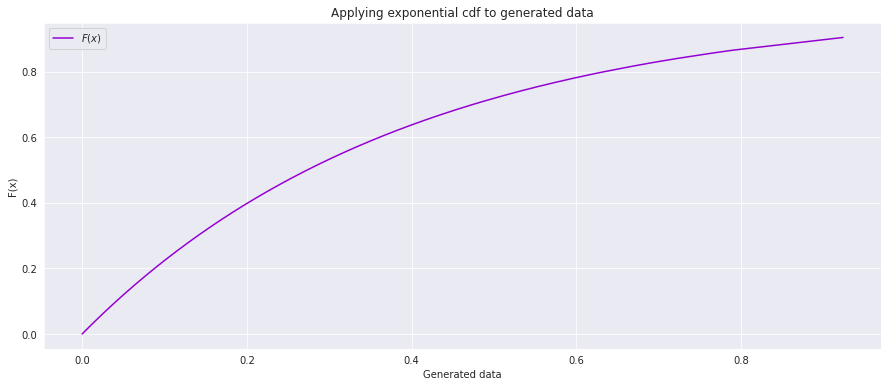

In [14]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

x = np.linspace(0,1,100000)
sns.lineplot(x_exp, exp_cdf(x_exp, 1/((x.mean() + x.std(ddof=1)) / 2)), ax=ax, color='darkviolet', label='$F(x)$')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'F(x)')
ax.set_title(u'Applying exponential cdf to generated data');
ax.legend();

#### 4. Відповідність заданому закону розподілу перевірити за допомогою критерію $\chi^2$

$H_0:$ дані мають експоненційний розподіл з заданим параметром $\lambda$

$H_1: H_0$ не виконується

In [15]:
def create_bins_expon(x, l, n_bins=30):
    start = x.min()
    finish = x.max() + 1e-9
    h = (finish - start) / n_bins
    n = x.size
    
    obs_freq = {}
    exp_freq = {}
    
    current = start

    i = 0
    while current <= finish:
        obs_freq[i] = np.sum((x >= current) & (x < (current+h)))
        p_i = np.exp(-l*current) - np.exp(-l*(current+h))
        exp_freq[i] = p_i * n
        i += 1
        current += h
    return normilize_bins_expon(obs_freq, exp_freq)

In [16]:
def normilize_bins_expon(obs_freq, exp_freq):
    assert len(obs_freq) > 2 or len(exp_freq) > 2

    for i in sorted(obs_freq.keys(), reverse=True)[:-1]:
        if obs_freq[i] <= 5 or exp_freq[i] <= 5:
            obs_freq[i-1] += obs_freq[i]
            exp_freq[i-1] += exp_freq[i]
            del obs_freq[i], exp_freq[i]
            
    return obs_freq, exp_freq

In [17]:
observed_freq, expected_freq = create_bins_expon(x_exp, 1/((x_exp.mean() + x_exp.std(ddof=1)) / 2))

In [18]:
stat_val, p_value = stats.chisquare(list(observed_freq.values()), list(expected_freq.values()), ddof=1)

**p-value:**

+ **Ймовірність отримати значення статистики як в експерименті чи ще більше екстримальне при справедливості нульової гіпотези**
+ **Чим нижче p-value, тим сильніше дані свідчать проти прийняття нульової гіпотези на користь альтернативи**

$p = P(T \geq t|H_0)$

In [19]:
alpha = 0.05
if p_value < alpha:
    print(f'Не можемо прийняти нульову гіпотезу на рівні значемості alpha={alpha}.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))
else:
    print('Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))

Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.
Значення статистики:
	- stat_val = 20.62903
	- p-value = 0.41925


**Підставимо хибне значення $\lambda$**:

In [20]:
observed_freq, expected_freq = create_bins_expon(x_exp, 2)

In [21]:
stat_val, p_value = stats.chisquare(list(observed_freq.values()), list(expected_freq.values()), ddof=1)

In [22]:
alpha = 0.05
if p_value < alpha:
    print(f'Не можемо прийняти нульову гіпотезу на рівні значемості alpha={alpha}.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))
else:
    print('Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))

Не можемо прийняти нульову гіпотезу на рівні значемості alpha=0.05.
Значення статистики:
	- stat_val = 16251.51981
	- p-value = 0.0


### Генерація даних з параметром $\lambda$ = 1.2

#### 1. Згенеруємо $N$ випадкових, рівномірно розподілених в інтервалі (0, 1) чисел $\epsilon_i$

In [23]:
n = 10000
lambda_2 = 1.2

In [24]:
epsilon_uniform = np.random.uniform(low=0, high=1, size=n)

**Побудуємо гістрограму даного розподілу:**

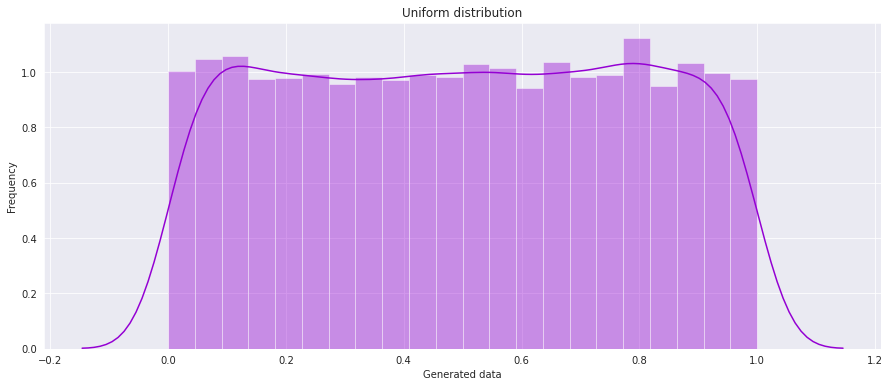

In [25]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

sns.distplot(epsilon_uniform, ax=ax, color='darkviolet')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'Frequency')
ax.set_title(u'Uniform distribution');

+ розподіл схожий на рівномірний
+ дані розподілені в інтервалі (0, 1)

**Перевіримо значення математичного сподівання та дисперсії, порівняємо з теоретичними:**

$M(\epsilon) = \int_0^1 x \,dx = \frac{1}{2}$

$D(\epsilon) = \int_0^1 (x - \frac{1}{2})^2 \,dx = \frac{1}{12}$

In [26]:
print('M(epsilon) = %s\nD(epsilon) = %s' % (epsilon_uniform.mean(), epsilon_uniform.std(ddof=1)**2))

M(epsilon) = 0.5002668283560772
D(epsilon) = 0.08381010413052314


+ значення математичного очікування та дисперсії подібні до теоретичних

#### 2. Згенеруємо $N$ чисел $x_i$ з експоненційного розподілу

$x_i = -\frac{1}{\lambda} ln(\epsilon_i)$

In [27]:
x_exp = -np.log(epsilon_uniform) / lambda_2

**Побудуємо гістрограму та KDE plot для згенерованих даних**

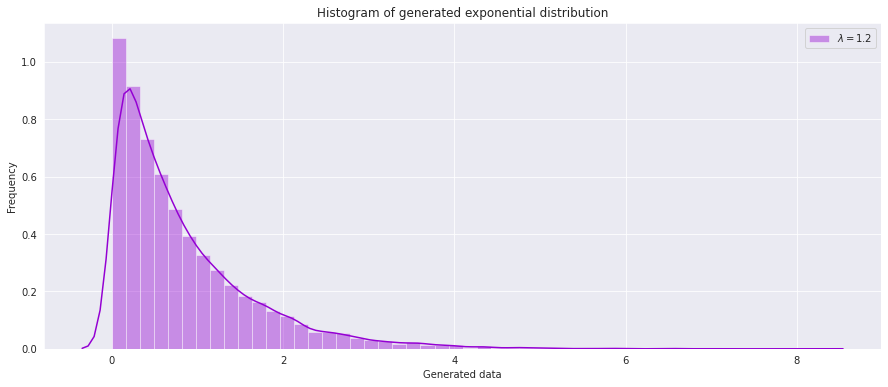

In [28]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

sns.distplot(x_exp, ax=ax, color='darkviolet', label=f'$\lambda = {lambda_2}$')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'Frequency')
ax.set_title(u'Histogram of generated exponential distribution');
ax.legend();

+ розподіл даних подібний до експоненційного

**Перевіримо значення математичного сподівання та дисперсії, порівняємо з теоретичними:**

$\mu = \frac{1}{\lambda}$

$D(x) = \sigma^2$, де $\sigma = \frac{1}{\lambda}$

In [29]:
print('M(x) = %s\nstd(x) = %s\nD(x) = %s' % (x_exp.mean(), x_exp.std(ddof=1), x_exp.std(ddof=1)**2))

M(x) = 0.8329584630527969
std(x) = 0.8283072948153118
D(x) = 0.6860929746442599


+ математичне сподівання приблизно дорівнює стандартному квадратичному відхиленню

#### 3. Cumulative distribution function:

$F(x) = 1 - e^{-\lambda x}$

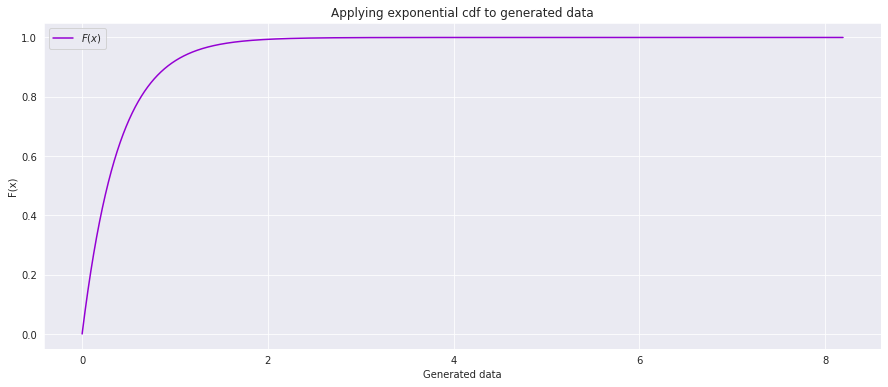

In [30]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

x = np.linspace(0,1,100000)
sns.lineplot(x_exp, exp_cdf(x_exp, 1/((x.mean() + x.std(ddof=1)) / 2)), ax=ax, color='darkviolet', label='$F(x)$')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'F(x)')
ax.set_title(u'Applying exponential cdf to generated data');
ax.legend();

#### 4. Відповідність заданому закону розподілу перевірити за допомогою критерію $\chi^2$

$H_0:$ дані мають експоненційний розподіл з заданим параметром $\lambda$

$H_1: H_0$ не виконується

In [31]:
observed_freq, expected_freq = create_bins_expon(x_exp, 1/((x_exp.mean() + x_exp.std(ddof=1)) / 2))

In [32]:
stat_val, p_value = stats.chisquare(list(observed_freq.values()), list(expected_freq.values()), ddof=1)

+ **Ймовірність отримати значення статистики як в експерименті чи ще більше екстримальне при справедливості нульової гіпотези**
+ **Чим нижче p-value, тим сильніше дані свідчать проти прийняття нульової гіпотези на користь альтернативи**

$p = P(T \geq t|H_0)$

In [33]:
alpha = 0.05
if p_value < alpha:
    print(f'Не можемо прийняти нульову гіпотезу на рівні значемості alpha={alpha}.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))
else:
    print('Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))

Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.
Значення статистики:
	- stat_val = 19.88334
	- p-value = 0.40163


**Підставимо хибне значення $\lambda$**:

In [34]:
observed_freq, expected_freq = create_bins_expon(x_exp, 5)

In [35]:
stat_val, p_value = stats.chisquare(list(observed_freq.values()), list(expected_freq.values()), ddof=1)

In [36]:
alpha = 0.05
if p_value < alpha:
    print(f'Не можемо прийняти нульову гіпотезу на рівні значемості alpha={alpha}.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))
else:
    print('Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))

Не можемо прийняти нульову гіпотезу на рівні значемості alpha=0.05.
Значення статистики:
	- stat_val = 382842.92575
	- p-value = 0.0


****
****
****

## II. Normal distribution

### Генерація даних з параметром $\mu = 0, \sigma = 1$

#### 1. Згенеруємо $N$ випадкових, рівномірно розподілених в інтервалі (0, 1) чисел $\epsilon_i$

In [37]:
n = 10000
mu_1 = 0
sigma_1 = 1

In [38]:
epsilon_uniform = np.random.uniform(low=0, high=1, size=(n, 12))

**Побудуємо гістрограму даного розподілу:**

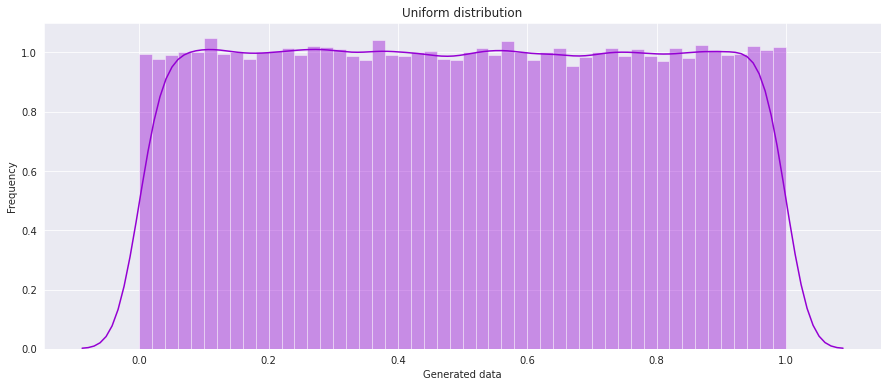

In [39]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

sns.distplot(epsilon_uniform, ax=ax, color='darkviolet')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'Frequency')
ax.set_title(u'Uniform distribution');

+ розподіл схожий на рівномірний
+ дані розподілені в інтервалі (0, 1)

**Перевіримо значення математичного сподівання та дисперсії, порівняємо з теоретичними:**

$M(\epsilon) = \int_0^1 x \,dx = \frac{1}{2}$

$D(\epsilon) = \int_0^1 (x - \frac{1}{2})^2 \,dx = \frac{1}{12}$

In [40]:
print('M(epsilon) = %s\nD(epsilon) = %s' % (epsilon_uniform.mean(), epsilon_uniform.std(ddof=1)**2))

M(epsilon) = 0.5001876147117275
D(epsilon) = 0.08348801337400137


+ значення математичного очікування та дисперсії подібні до теоретичних

#### 2. Згенеруємо $N$ чисел $x_i$ з нормального розподілу

$x_i = \sigma \mu_i + \alpha$, де

$\mu_i = \sum_{i=1}^{12} \epsilon_i - 6$

In [41]:
x_normal = sigma_1 * (epsilon_uniform.sum(axis=1) - 6) + mu_1

**Побудуємо гістрограму та KDE plot для згенерованих даних**

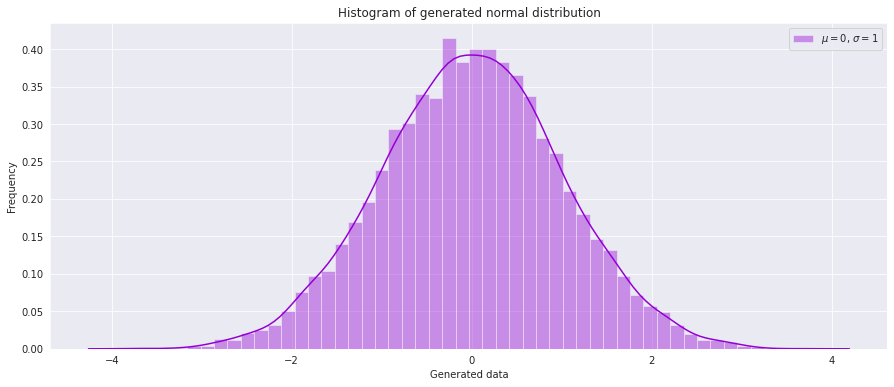

In [42]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

sns.distplot(x_normal, ax=ax, color='darkviolet', label=f'$\mu = {mu_1}$, $\sigma = {sigma_1}$')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'Frequency')
ax.set_title(u'Histogram of generated normal distribution');
ax.legend();

+ розподіл даних подібний до нормального з відповідними параметрами

**Перевіримо значення математичного сподівання та дисперсії, порівняємо з теоретичними:**

$\mu = \mu_1$

$D(x) = \sigma^2$, де $\sigma = \sigma_1$

In [43]:
print('M(x) = %s\nstd(x) = %s\nD(x) = %s' % (x_normal.mean(), x_normal.std(ddof=1), x_normal.std(ddof=1)**2))

M(x) = 0.00225137654072899
std(x) = 0.9988180394980531
D(x) = 0.9976374760267345


+ параметри математичного сподівання та стандарного відхилення подібні до тих, які ми хотіли отримати

**Створимо єдину функцію для генерування випадкового розподілу:**

In [44]:
def generate_normal_distr(mu, sigma, n=10000):
    epsilon_uniform = np.random.uniform(low=0, high=1, size=(n, 12))
    return sigma_1 * (epsilon_uniform.sum(axis=1) - 6) + mu_1

#### 3. Probability density function and Cumulative distribution function:

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - a)^2}{2 \sigma^2}}$

In [45]:
def normal_pdf(x, mu, sigma):
    """
        Probability density function
    """
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-np.power((x-mu)/sigma, 2)/2) # f

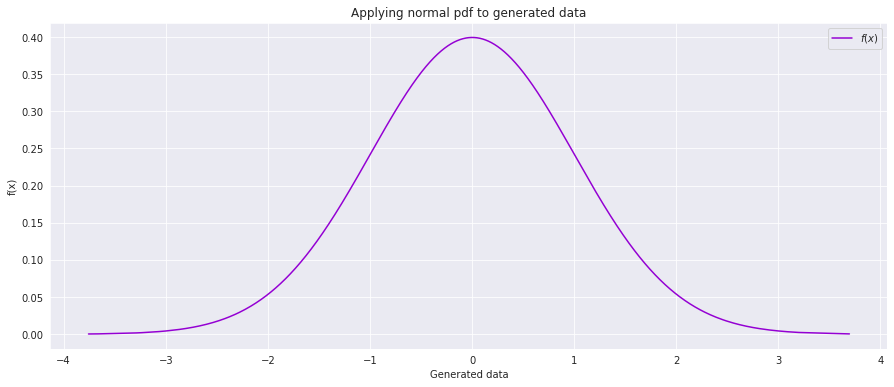

In [46]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

x = np.linspace(0,1,100000)
sns.lineplot(x_normal, normal_pdf(x_normal, x_normal.mean(), x_normal.std(ddof=1)), ax=ax, color='darkviolet', label='$f(x)$')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'f(x)')
ax.set_title(u'Applying normal pdf to generated data');
ax.legend();

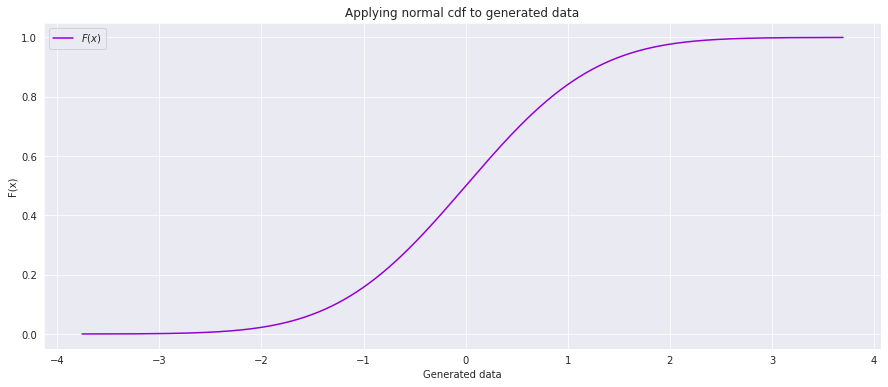

In [47]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

x = np.linspace(0,1,100000)
sns.lineplot(x_normal, stats.norm.cdf(x_normal, x_normal.mean(), x_normal.std(ddof=1)), ax=ax, color='darkviolet', label='$F(x)$')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'F(x)')
ax.set_title(u'Applying normal cdf to generated data');
ax.legend();

#### 4. Відповідність заданому закону розподілу перевірити за допомогою критерію $\chi^2$

$H_0:$ дані мають нормальний розподіл з заданим параметром $\mu$ та $\sigma$

$H_1: H_0$ не виконується

In [48]:
def create_bins_norm(x, mu, sigma, n_bins=30):
    start = x.min()
    finish = x.max() + 1e-9
    h = (finish - start) / n_bins
    n = x.size

    obs_freq = {}
    exp_freq = {}
    
    current = start

    i = 0
    while current <= finish:
        obs_freq[i] = np.sum((x >= current) & (x < (current+h)))
        p_i = np.abs(stats.norm(mu, sigma).cdf(current) - stats.norm(mu, sigma).cdf(current+h))
        exp_freq[i] = p_i * n
        i += 1
        current += h
    return normilize_bins_norm(obs_freq, exp_freq)

In [49]:
def normilize_bins_norm(obs_freq, exp_freq):
    assert len(obs_freq) > 2 or len(exp_freq) > 2
        
    for i in sorted(obs_freq.keys(), reverse=True)[:-1]:
        if obs_freq[i] <= 5 or exp_freq[i] <= 5:
            obs_freq[i-1] += obs_freq[i]
            exp_freq[i-1] += exp_freq[i]
            del obs_freq[i], exp_freq[i]
    
    for i in sorted(obs_freq.keys())[:-1]:
        if obs_freq[i] <= 5 or exp_freq[i] <= 5:
            j = 1
            while not i+j in obs_freq:
                j += 1
            obs_freq[i+j] += obs_freq[i]
            exp_freq[i+j] += exp_freq[i]
            del obs_freq[i], exp_freq[i]
    
    return obs_freq, exp_freq

In [50]:
observed_freq, expected_freq = create_bins_norm(x_normal, x_normal.mean(), x_normal.std(ddof=1))

In [52]:
stat_val, p_value = stats.chisquare(list(observed_freq.values()), list(expected_freq.values()), ddof=2)

+ **Ймовірність отримати значення статистики як в експерименті чи ще більше екстримальне при справедливості нульової гіпотези**
+ **Чим нижче p-value, тим сильніше дані свідчать проти прийняття нульової гіпотези на користь альтернативи**

$p = P(T \geq t|H_0)$

In [53]:
alpha = 0.05
if p_value < alpha:
    print(f'Не можемо прийняти нульову гіпотезу на рівні значемості alpha={alpha}.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))
else:
    print('Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))

Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.
Значення статистики:
	- stat_val = 24.40442
	- p-value = 0.38171


**Підставимо хибне значення $\mu$ та $\sigma$**:

In [54]:
observed_freq, expected_freq = create_bins_norm(x_normal, 0, 15)

In [55]:
stat_val, p_value = stats.chisquare(list(observed_freq.values()), list(expected_freq.values()), ddof=2)

In [56]:
alpha = 0.05
if p_value < alpha:
    print(f'Не можемо прийняти нульову гіпотезу на рівні значемості alpha={alpha}.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))
else:
    print('Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))

Не можемо прийняти нульову гіпотезу на рівні значемості alpha=0.05.
Значення статистики:
	- stat_val = 88106.76529
	- p-value = 0.0


### Генерація даних з параметром $\mu = 12, \sigma = 24$

#### 1. Згенеруємо $N$ випадкових, рівномірно розподілених в інтервалі (0, 1) чисел $\epsilon_i$

In [57]:
n = 10000
mu_2 = 12
sigma_2 = 24

In [58]:
epsilon_uniform = np.random.uniform(low=0, high=1, size=(n, 12))

**Побудуємо гістрограму даного розподілу:**

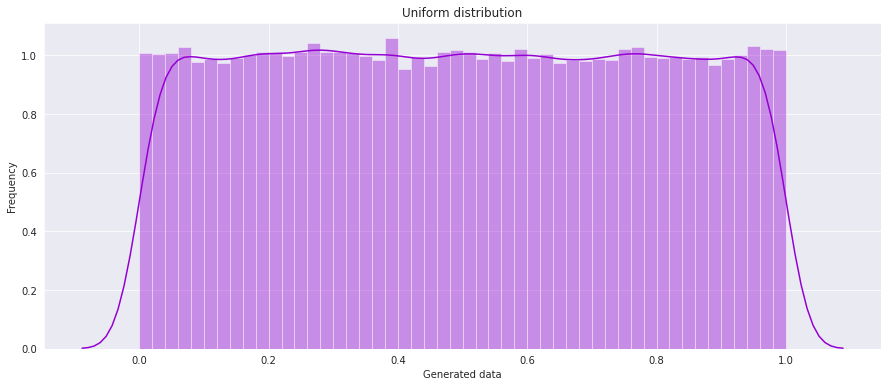

In [59]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

sns.distplot(epsilon_uniform, ax=ax, color='darkviolet')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'Frequency')
ax.set_title(u'Uniform distribution');

+ розподіл схожий на рівномірний
+ дані розподілені в інтервалі (0, 1)

**Перевіримо значення математичного сподівання та дисперсії, порівняємо з теоретичними:**

$M(\epsilon) = \int_0^1 x \,dx = \frac{1}{2}$

$D(\epsilon) = \int_0^1 (x - \frac{1}{2})^2 \,dx = \frac{1}{12}$

In [60]:
print('M(epsilon) = %s\nD(epsilon) = %s' % (epsilon_uniform.mean(), epsilon_uniform.std(ddof=1)**2))

M(epsilon) = 0.4997155535654053
D(epsilon) = 0.08349931003425738


+ значення математичного очікування та дисперсії подібні до теоретичних

#### 2. Згенеруємо $N$ чисел $x_i$ з нормального розподілу

$x_i = \sigma \mu_i + \alpha$, де

$\mu_i = \sum_{i=1}^{12} \epsilon_i - 6$

In [61]:
x_normal = sigma_2 * (epsilon_uniform.sum(axis=1) - 6) + mu_2

**Побудуємо гістрограму та KDE plot для згенерованих даних**

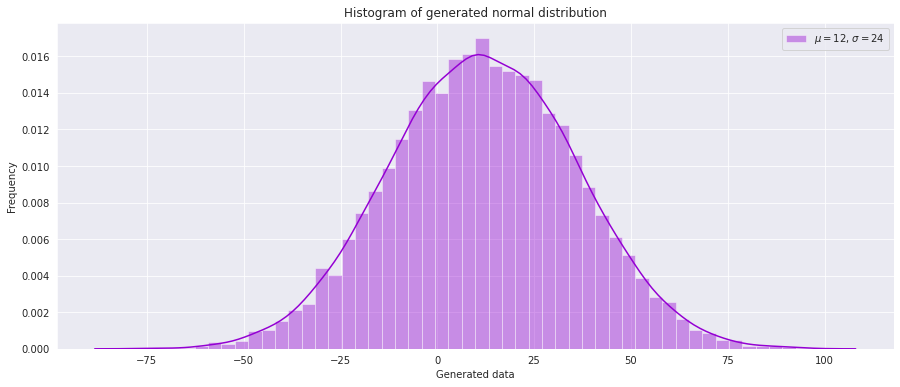

In [62]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

sns.distplot(x_normal, ax=ax, color='darkviolet', label=f'$\mu = {mu_2}$, $\sigma = {sigma_2}$')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'Frequency')
ax.set_title(u'Histogram of generated normal distribution');
ax.legend();

+ розподіл даних подібний до нормального з відповідними параметрами

**Перевіримо значення математичного сподівання та дисперсії, порівняємо з теоретичними:**

$\mu = \mu_1$

$D(x) = \sigma^2$, де $\sigma = \sigma_1$

In [63]:
print('M(x) = %s\nstd(x) = %s\nD(x) = %s' % (x_normal.mean(), x_normal.std(ddof=1), x_normal.std(ddof=1)**2))

M(x) = 11.91807942683673
std(x) = 23.90276101765187
D(x) = 571.3419842669779


+ параметри математичного сподівання та стандарного відхилення подібні до тих, які ми хотіли отримати

#### 3. Probability density function and Cumulative distribution function:

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - a)^2}{2 \sigma^2}}$

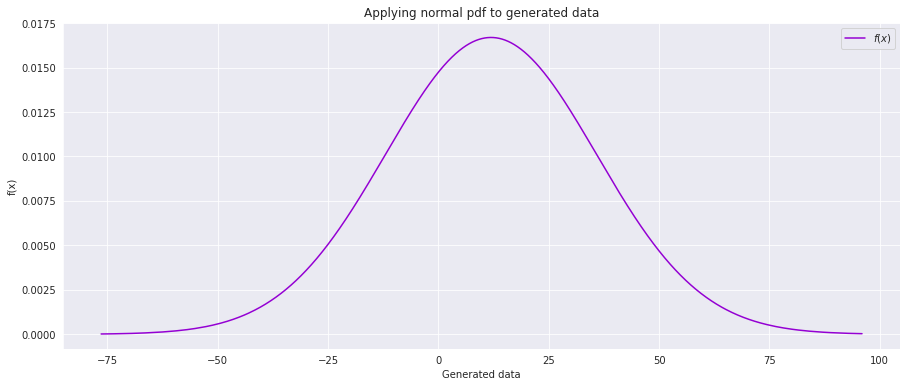

In [64]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

x = np.linspace(0,1,100000)
sns.lineplot(x_normal, normal_pdf(x_normal, x_normal.mean(), x_normal.std(ddof=1)), ax=ax, color='darkviolet', label='$f(x)$')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'f(x)')
ax.set_title(u'Applying normal pdf to generated data');
ax.legend();

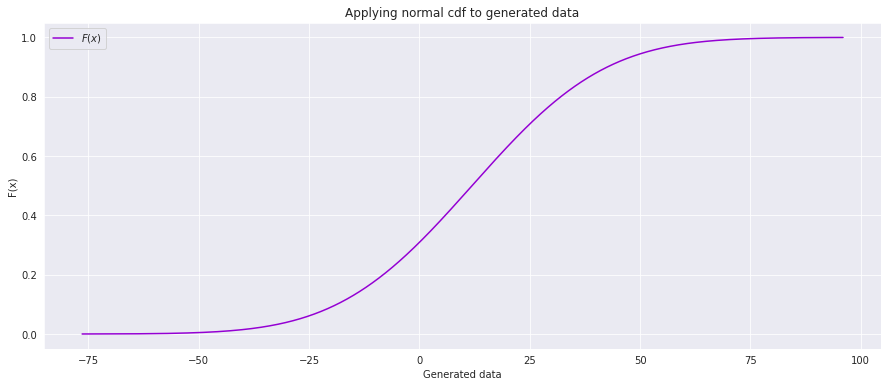

In [65]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

x = np.linspace(0,1,100000)
sns.lineplot(x_normal, stats.norm.cdf(x_normal, x_normal.mean(), x_normal.std(ddof=1)), ax=ax, color='darkviolet', label='$F(x)$')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'F(x)')
ax.set_title(u'Applying normal cdf to generated data');
ax.legend();

#### 4. Відповідність заданому закону розподілу перевірити за допомогою критерію $\chi^2$

$H_0:$ дані мають нормальний розподіл з заданим параметром $\mu$ та $\sigma$

$H_1: H_0$ не виконується

In [66]:
observed_freq, expected_freq = create_bins_norm(x_normal, x_normal.mean(), x_normal.std(ddof=1))

In [67]:
stat_val, p_value = stats.chisquare(list(observed_freq.values()), list(expected_freq.values()), ddof=2)

+ **Ймовірність отримати значення статистики як в експерименті чи ще більше екстримальне при справедливості нульової гіпотези**
+ **Чим нижче p-value, тим сильніше дані свідчать проти прийняття нульової гіпотези на користь альтернативи**

$p = P(T \geq t|H_0)$

In [68]:
alpha = 0.05
if p_value < alpha:
    print(f'Не можемо прийняти нульову гіпотезу на рівні значемості alpha={alpha}.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))
else:
    print('Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))

Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.
Значення статистики:
	- stat_val = 12.59219
	- p-value = 0.97238


**Підставимо хибне значення $\mu$ та $\sigma$**:

In [69]:
observed_freq, expected_freq = create_bins_norm(x_normal, 10, 25)

In [70]:
stat_val, p_value = stats.chisquare(list(observed_freq.values()), list(expected_freq.values()), ddof=2)

In [71]:
alpha = 0.05
if p_value < alpha:
    print(f'Не можемо прийняти нульову гіпотезу на рівні значемості alpha={alpha}.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))
else:
    print('Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))

Не можемо прийняти нульову гіпотезу на рівні значемості alpha=0.05.
Значення статистики:
	- stat_val = 101.02813
	- p-value = 0.0


****
****
****

## III. Uniform distribution

### Генерація даних з параметром $a = 5^{13}, c = 2^{31}$

#### 1. Згенеруємо $N$ випадкових чисел, використовуючи конгруентний метод:

$x_{i+1} = z_{i+1} \div c$, де

$z_{i+1} = a z_i ($ mod $c)$

In [72]:
n = 10000

z_0 = 9
z = z_0
a = 5 ** 13
c = 2 ** 31
x_uniform = []

for i in range(n):
    x = z / c
    x_uniform.append(x)
    z = (a * z) % c
    
x_uniform = np.array(x_uniform)

**Побудуємо гістрограму даного розподілу:**

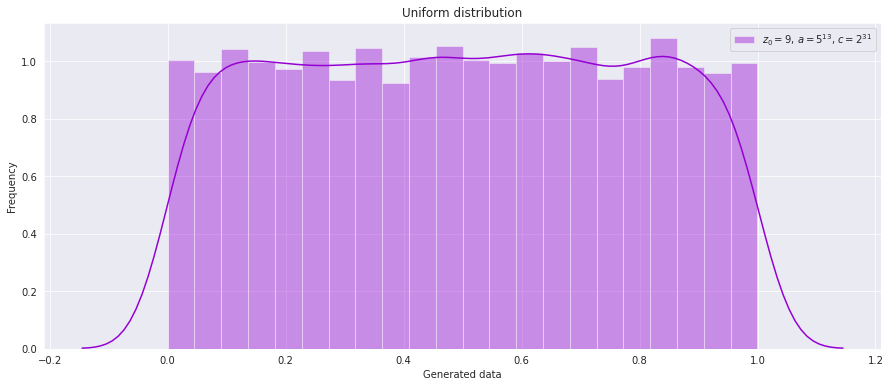

In [73]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

sns.distplot(x_uniform, ax=ax, color='darkviolet', label='$z_0 = 9$, $a = 5^{13}$, $c = 2^{31}$')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'Frequency')
ax.set_title(u'Uniform distribution');
ax.legend();

+ розподіл схожий на рівномірний
+ дані розподілені в інтервалі (0, 1)

**Перевіримо значення математичного сподівання та дисперсії, порівняємо з теоретичними:**

$M(\epsilon) = \int_0^1 x \,dx = \frac{1}{2}$

$D(\epsilon) = \int_0^1 (x - \frac{1}{2})^2 \,dx = \frac{1}{12}$

In [74]:
print('M(epsilon) = %s\nD(epsilon) = %s' % (x_uniform.mean(), x_uniform.std(ddof=1)**2))

M(epsilon) = 0.4999288878433406
D(epsilon) = 0.08299691989657997


+ значення математичного очікування та дисперсії подібні до теоретичних

**Давайте знайдемо параметри даного розподілу:**

In [75]:
b_obs = x_uniform.mean() + np.sqrt(3)*x_uniform.std(ddof=1)
a_obs = 2*x_uniform.mean() - b_obs

print(f'a_obs = {round(a_obs, 5)}, b_obs = {round(b_obs, 5)}')

a_obs = 0.00094, b_obs = 0.99892


**Створимо єдину функцію для генерування випадкового розподілу:**

In [76]:
def generate_uniform_distr(z_0, a, c, n=10000):
    x_uniform = []

    for i in range(n):
        x = z / c
        x_uniform.append(x)
        z = (a * z) % c

    return np.array(x_uniform)

#### 3. Probability density function:

$f(x) = \frac{1}{b - a}$, $a \leq x \leq b$

In [77]:
def uniform_pdf(x, a, b):
    """
        Probability density function
    """
    return (1/(b-a))*((x >= a) & (x <= b)) # f

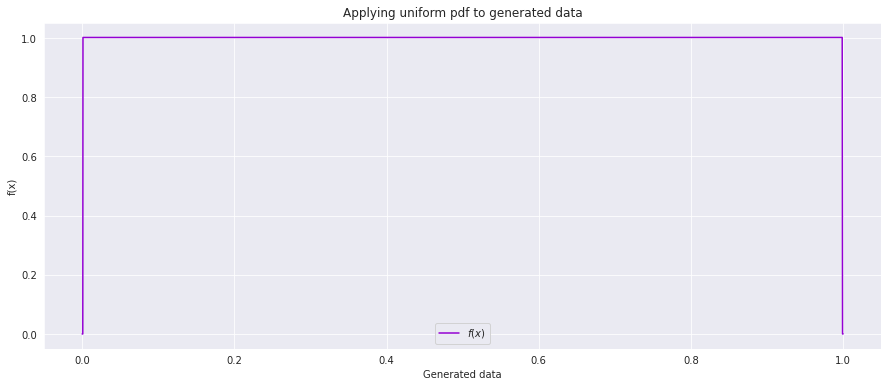

In [78]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

x = np.linspace(0,1,100000)
sns.lineplot(x_uniform, uniform_pdf(x_uniform, a_obs, b_obs), ax=ax, color='darkviolet', label='$f(x)$')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'f(x)')
ax.set_title(u'Applying uniform pdf to generated data');
ax.legend();

#### 4. Відповідність заданому закону розподілу перевірити за допомогою критерію $\chi^2$

$H_0:$ дані мають рівномірний розподіл з заданим параметром $a$ та $b$

$H_1: H_0$ не виконується

In [79]:
def create_bins_uniform(x, a, b, n_bins=30):
    start = x.min()
    finish = x.max() + 1e-9
    h = (finish - start) / n_bins
    n = x.size
    
    obs_freq = {}
    exp_freq = {}
    
    current = start

    i = 0
    while current <= finish:
        obs_freq[i] = np.sum((x >= current) & (x < (current+h)))
        p_i = np.abs(stats.uniform(a, b).cdf(current) - stats.uniform(a, b).cdf(current+h))
        exp_freq[i] = p_i * n
        i += 1
        current += h
    return normilize_bins_uniform(obs_freq, exp_freq)

In [80]:
def normilize_bins_uniform(obs_freq, exp_freq):
    assert len(obs_freq) > 2 or len(exp_freq) > 2
        
    for i in sorted(obs_freq.keys(), reverse=True)[:-1]:
        if obs_freq[i] <= 5 or exp_freq[i] <= 5:
            obs_freq[i-1] += obs_freq[i]
            exp_freq[i-1] += exp_freq[i]
            del obs_freq[i], exp_freq[i]
    
    for i in sorted(obs_freq.keys())[:-1]:
        if obs_freq[i] <= 5 or exp_freq[i] <= 5:
            j = 1
            while not i+j in obs_freq:
                j += 1
            obs_freq[i+j] += obs_freq[i]
            exp_freq[i+j] += exp_freq[i]
            del obs_freq[i], exp_freq[i]
    
    return obs_freq, exp_freq

In [81]:
b = (x.mean() + np.sqrt(3)*x.std(ddof=1))
a = 2*x.mean() - b

observed_freq, expected_freq = create_bins_uniform(x_uniform, a, b)

In [82]:
stat_val, p_value = stats.chisquare(list(observed_freq.values()), list(expected_freq.values()), ddof=2)

+ **Ймовірність отримати значення статистики як в експерименті чи ще більше екстримальне при справедливості нульової гіпотези**
+ **Чим нижче p-value, тим сильніше дані свідчать проти прийняття нульової гіпотези на користь альтернативи**

$p = P(T \geq t|H_0)$

In [83]:
alpha = 0.05
if p_value < alpha:
    print(f'Не можемо прийняти нульову гіпотезу на рівні значемості alpha={alpha}.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))
else:
    print('Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))

Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.
Значення статистики:
	- stat_val = 31.61227
	- p-value = 0.24675


**Підставимо хибне значення $a$ та $b$**:

In [84]:
observed_freq, expected_freq = create_bins_uniform(x_uniform, 0, 0.5)

In [87]:
stat_val, p_value = stats.chisquare(list(observed_freq.values()), list(expected_freq.values()), ddof=2)

In [88]:
alpha = 0.05
if p_value < alpha:
    print(f'Не можемо прийняти нульову гіпотезу на рівні значемості alpha={alpha}.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))
else:
    print('Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))

Не можемо прийняти нульову гіпотезу на рівні значемості alpha=0.05.
Значення статистики:
	- stat_val = 34972.82104
	- p-value = 0.0


### Генерація даних з параметром $a = 8^{9}, c = 2^{63}$

#### 1. Згенеруємо $N$ випадкових чисел, використовуючи конгруентний метод:

$x_{i+1} = z_{i+1} \div c$, де

$z_{i+1} = a z_i ($ mod $c)$

In [89]:
n = 10000

z_0 = 17
z = z_0
a = 5 ** 19
c = 2 ** 63
x_uniform = []

for i in range(n):
    x = z / c
    x_uniform.append(x)
    z = (a * z) % c
    
x_uniform = np.array(x_uniform)

**Побудуємо гістрограму даного розподілу:**

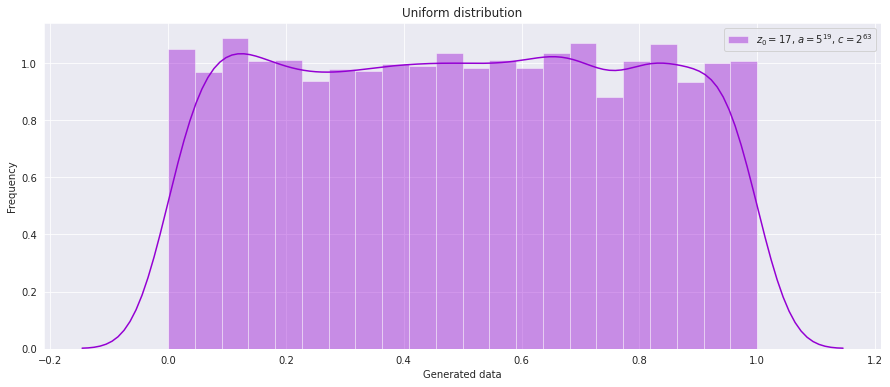

In [90]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

sns.distplot(x_uniform, ax=ax, color='darkviolet', label='$z_0 = 17$, $a = 5^{19}$, $c = 2^{63}$')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'Frequency')
ax.set_title(u'Uniform distribution');
ax.legend();

+ розподіл схожий на рівномірний
+ дані розподілені в інтервалі (0, 1)

**Перевіримо значення математичного сподівання та дисперсії, порівняємо з теоретичними:**

$M(\epsilon) = \int_0^1 x \,dx = \frac{1}{2}$

$D(\epsilon) = \int_0^1 (x - \frac{1}{2})^2 \,dx = \frac{1}{12}$

In [91]:
print('M(epsilon) = %s\nD(epsilon) = %s' % (x_uniform.mean(), x_uniform.std(ddof=1)**2))

M(epsilon) = 0.49829352325505827
D(epsilon) = 0.08385442915042123


+ значення математичного очікування та дисперсії подібні до теоретичних

**Давайте знайдемо параметри даного розподілу:**

In [92]:
b_obs = x_uniform.mean() + np.sqrt(3)*x_uniform.std(ddof=1)
a_obs = 2*x_uniform.mean() - b_obs

print(f'a_obs = {round(a_obs, 5)}, b_obs = {round(b_obs, 5)}')

a_obs = -0.00327, b_obs = 0.99985


#### 3. Probability density function:

$f(x) = \frac{1}{b - a}$, $a \leq x \leq b$

In [93]:
def uniform_pdf(x, a, b):
    """
        Probability density function
    """
    return (1/(b-a))*((x >= a) & (x <= b)) # f

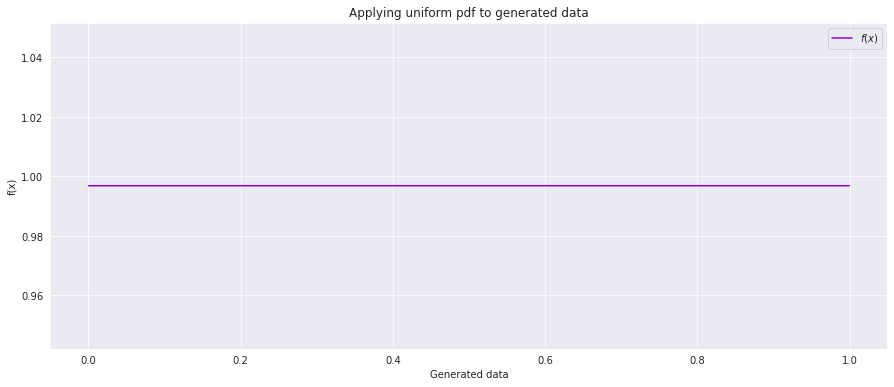

In [94]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

x = np.linspace(0,1,100000)
sns.lineplot(x_uniform, uniform_pdf(x_uniform, a_obs, b_obs), ax=ax, color='darkviolet', label='$f(x)$')

ax.set_xlabel(u'Generated data')
# ax.set_xlim(0, 200)
ax.set_ylabel(u'f(x)')
ax.set_title(u'Applying uniform pdf to generated data');
ax.legend();

#### 4. Відповідність заданому закону розподілу перевірити за допомогою критерію $\chi^2$

$H_0:$ дані мають рівномірний розподіл з заданим параметром $a$ та $b$

$H_1: H_0$ не виконується

In [95]:
b = (x.mean() + np.sqrt(3)*x.std(ddof=1))
a = 2*x.mean() - b

observed_freq, expected_freq = create_bins_uniform(x_uniform, a, b)

In [96]:
stat_val, p_value = stats.chisquare(list(observed_freq.values()), list(expected_freq.values()), ddof=2)

+ **Ймовірність отримати значення статистики як в експерименті чи ще більше екстримальне при справедливості нульової гіпотези**
+ **Чим нижче p-value, тим сильніше дані свідчать проти прийняття нульової гіпотези на користь альтернативи**

$p = P(T \geq t|H_0)$

In [97]:
alpha = 0.05
if p_value < alpha:
    print(f'Не можемо прийняти нульову гіпотезу на рівні значемості alpha={alpha}.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))
else:
    print('Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))

Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.
Значення статистики:
	- stat_val = 31.80644
	- p-value = 0.23933


**Підставимо хибне значення $a$ та $b$**:

In [98]:
observed_freq, expected_freq = create_bins_uniform(x_uniform, 0, 0.9)

In [99]:
stat_val, p_value = stats.chisquare(list(observed_freq.values()), list(expected_freq.values()), ddof=2)

In [100]:
alpha = 0.05
if p_value < alpha:
    print(f'Не можемо прийняти нульову гіпотезу на рівні значемості alpha={alpha}.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))
else:
    print('Можемо прийняти нульову гіпотезу про розподіл данних з заданим параметром.')
    print('Значення статистики:')
    print('\t- stat_val = %s\n\t- p-value = %s' % (round(stat_val, 5), round(p_value, 5)))

Не можемо прийняти нульову гіпотезу на рівні значемості alpha=0.05.
Значення статистики:
	- stat_val = 2538.04452
	- p-value = 0.0


****
****
****

## IV. Conclusion

Для виконання лабораторної роботи ми використовували метод оберненої ункції та методи, які використовують спеціальні властивості функції. Після чого ми перевіряли чи наш генератор випадкових чисел працює коректрно, застосовуючи критерій $\chi^2$ з $H_0:$ згенерована послідовність відповідає теоретичній з заданими параметрами.

**1.**
+ Для генерування експоненційно розподіленої випадкової величини з параметром $\lambda$ ми використовували метод оберненої функції.
+ В основі даного методу лежить факт, що випадкова величина $\epsilon = F(r)$ є рівномірно розподіленою на інтервалі (0, 1)
+ Тоді, випалкову величину $r$ , розподілену за заданим законом розподілу $F(x)$, можна отримати у такий спосіб:
    <ol type="a">
    <li>згенерувати випадкову рівномірно розподілену величину $\epsilon$</li>
    <li>перетворити її у випадкову величину $r = F^{-1}(\epsilon)$</li>
    </ol>
    
$x_i = -\frac{1}{\lambda} ln(\epsilon_i)$

**2.**
+ Для генерування нормально розподіленої випадкової величини з параметрами $\mu$ та $\sigma$ ми використовували метод, який використовує спеціальні властивості законів розподілу (див. наступні рівняння):

$x_i = \sigma a_i + \mu$, де

$a_i = \sum_{i=1}^{12} \epsilon_i - 6$, де $\epsilon_i$ - це рівномірно розподілена випадкова величиа на інтервалі (0, 1)

**3.**
+ Для генерування рівномірно розподілених даних в інтервалі (0, 1) випадкових величин мною було використано конгруентний метод. Він киористовує наступні рівняння:
    
$x_{i+1} = z_{i+1} \div c$, де

$z_{i+1} = a z_i ($ mod $c)$

+ Недоліки такого генератора: як тільки в послідовності значень $z_i$ зустрінеться число, яке спостерігалось раніше, тоді вся послідовність значень повторюється